In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

import os
from pandas import DataFrame
import pandas as pd
from notebook_utils import NotebookUtilities
import matplotlib.pyplot as plt
import re
import humanize
from datetime import timedelta

nu = NotebookUtilities(data_folder_path=os.path.abspath('../data'))

In [3]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    # df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    # display(df.T)

(842663, 112)



# Total User Actions Taken

In [4]:

# Total user actions taken
if nu.pickle_exists('total_actions_df'):
    total_actions_df = nu.load_object('total_actions_df')
else:
    
    # Create an empty list to store row dictionaries
    rows_list = []
    
    # Iterate over each scene
    for (session_uuid, scene_index), scene_df in fu.get_session_groupby(extra_column='scene_index'):
    
        # Initialize a dictionary for the current row
        row_dict = {}
        
        # Assign UUID and scene to the row dictionary
        for cn in fu.scene_groupby_columns: row_dict[cn] = eval(cn)
        
        # Add the logger version and scene categories
        row_dict['logger_version'] = fu.get_logger_version(scene_df)
        row_dict['is_scene_aborted'] = fu.get_is_scene_aborted(scene_df)
        row_dict['scene_type'] = fu.get_scene_type(scene_df)
        
        # Count the total actions that match the mask and assign it to the row dictionary
        row_dict['total_actions'] = fu.get_total_actions(scene_df)
        
        # Append the row dictionary to the list of rows
        rows_list.append(row_dict)
    
    # Create a data frame from the list of row dictionaries
    total_actions_df = DataFrame(rows_list)
    nu.store_objects(total_actions_df=total_actions_df)

Pickling to C:\Users\DaveBabbitt\Documents\GitHub\itm-analysis-reporting\saves\pkl\total_actions_df.pkl


In [5]:

# Show a sort of Total User Actions Taken
total_actions_df.sort_values(
    ['total_actions'], ascending=[True]
)

,session_uuid,scene_index,logger_version,is_scene_aborted,scene_type,total_actions
0,009b848c-ea64-4f22-bd40-711213a3d327,0,1.3,False,Orientation,0
741,a62cdd57-739f-4f98-b0bd-45e7aced8b73,0,1.0,False,Triage,0
310,400b6351-6f35-4f5b-98a6-db100a2fefd8,0,1.0,False,Orientation,0
307,3f142e7e-1e18-4341-947a-71f2e7f35aa2,0,1.0,False,Orientation,0
750,a7804ee3-6a1c-4462-957a-17976a540483,2,1.3,False,Triage,0
...,...,...,...,...,...,...
79,0dc94285-ba14-40aa-9745-76504502a5cc,3,1.3,False,Triage,27214
773,aec5d448-c4e6-4af7-8e36-d258c7bb6f96,2,1.3,False,Triage,42474
687,991af001-9414-4a2d-8079-0663c4ddb1e4,1,1.3,False,Triage,44061
188,26f08763-076e-4531-a6f7-f00232f664bd,1,1.3,False,Triage,51395


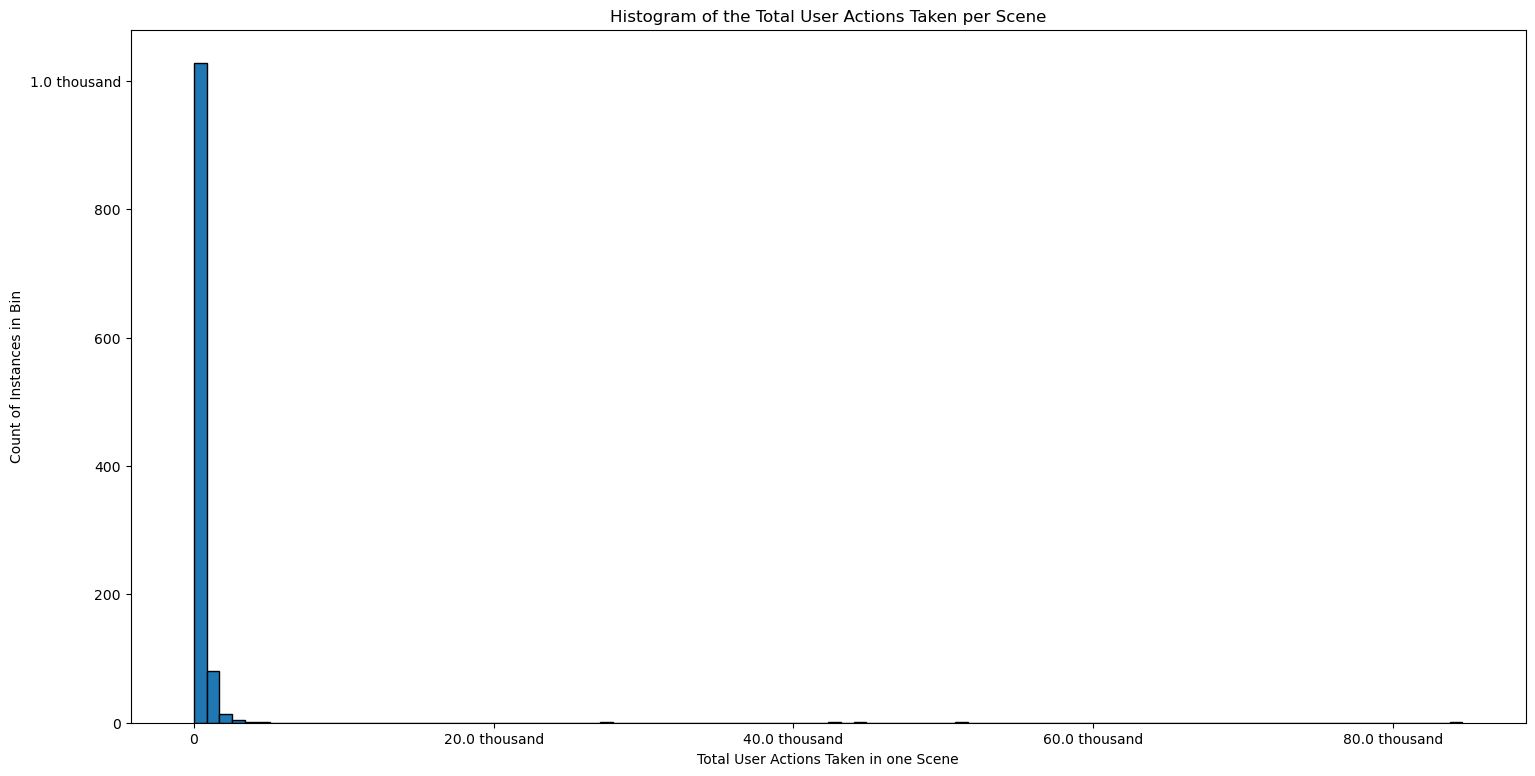

In [6]:

# Display a histogram of the distribution of the number of teleports
xlabel = 'Total User Actions Taken in one Scene'
get_xtick_text = lambda text_obj: humanize.intword(int(text_obj.get_position()[0]))
title = 'Histogram of the Total User Actions Taken per Scene'
mask_series = (total_actions_df.scene_type == 'Triage') & (total_actions_df.is_scene_aborted == False)
ax = nu.plot_histogram(total_actions_df, 'total_actions', xlabel=xlabel, xtick_text_fn=get_xtick_text, title=title)

In [7]:

# Create a boolean mask to filter rows with action types in the list
mask_series = (frvrs_logs_df.action_type.isin(fu.action_types_list))

# Add to the mask_series to filter rows with specific voice commands
mask_series |= ((frvrs_logs_df.action_type == 'VOICE_COMMAND') & (frvrs_logs_df.voice_command_message.isin(fu.command_messages_list)))

nu.get_minority_combinations(
    frvrs_logs_df[mask_series], ['action_type', 'voice_command_message']
).dropna(axis='columns', how='all').T

,115418,226324,150408,704036
action_type,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND
elapsed_time,198767,263922,222628,393644
event_time,2023-04-25 11:35:49,2023-07-25 08:51:30,2022-12-07 12:45:28,2023-03-07 10:23:00
session_uuid,33f3d2d4-49b4-43cf-80d4-cd7d5993aca4,55dcba1c-2bfc-4028-984d-5c288c8b7265,331f875e-eba1-4033-a502-6a888aee4e9c,33e7d6b6-2868-42e6-8967-d6890efb87a7
file_name,All CSV files renamed by date/04.25.23.1132.csv,DCEMS Round 2 only triage sessions/Ryan K.csv,All CSV files renamed by date/12.07.22.1249.csv,v.1.0/Clean Marty11.csv
logger_version,1.3,1.0,1.0,1.0
scene_index,1,1,1,2
voice_command_message,hold still,where are you,anywhere else,sit up/down
voice_command_command_description,hold still,hi [PERSON] where are you hurting at,your arm or are you hurt anywhere else,oh OK where do i how do i reposition
scene_type,Triage,Triage,Triage,Triage


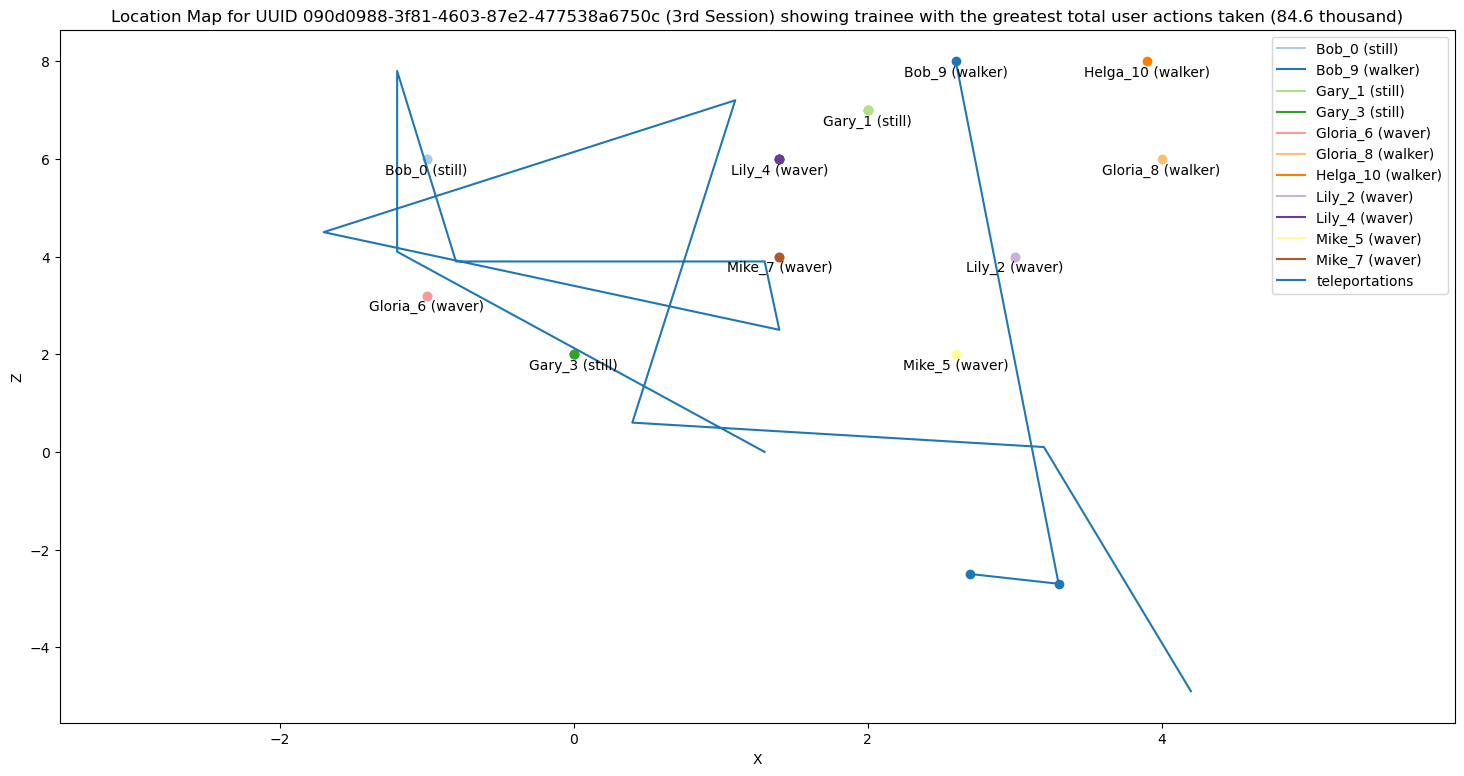

In [17]:

# Get scene with the greatest total user actions taken, v1.3
mask_series = (total_actions_df.logger_version == 1.3)
fu.visualize_extreme_player_movement(
    total_actions_df, 'total_actions', mask_series=mask_series, is_ascending=False,
    humanize_type='intword', title_str='greatest total user actions taken', frvrs_logs_df=frvrs_logs_df, verbose=False
)

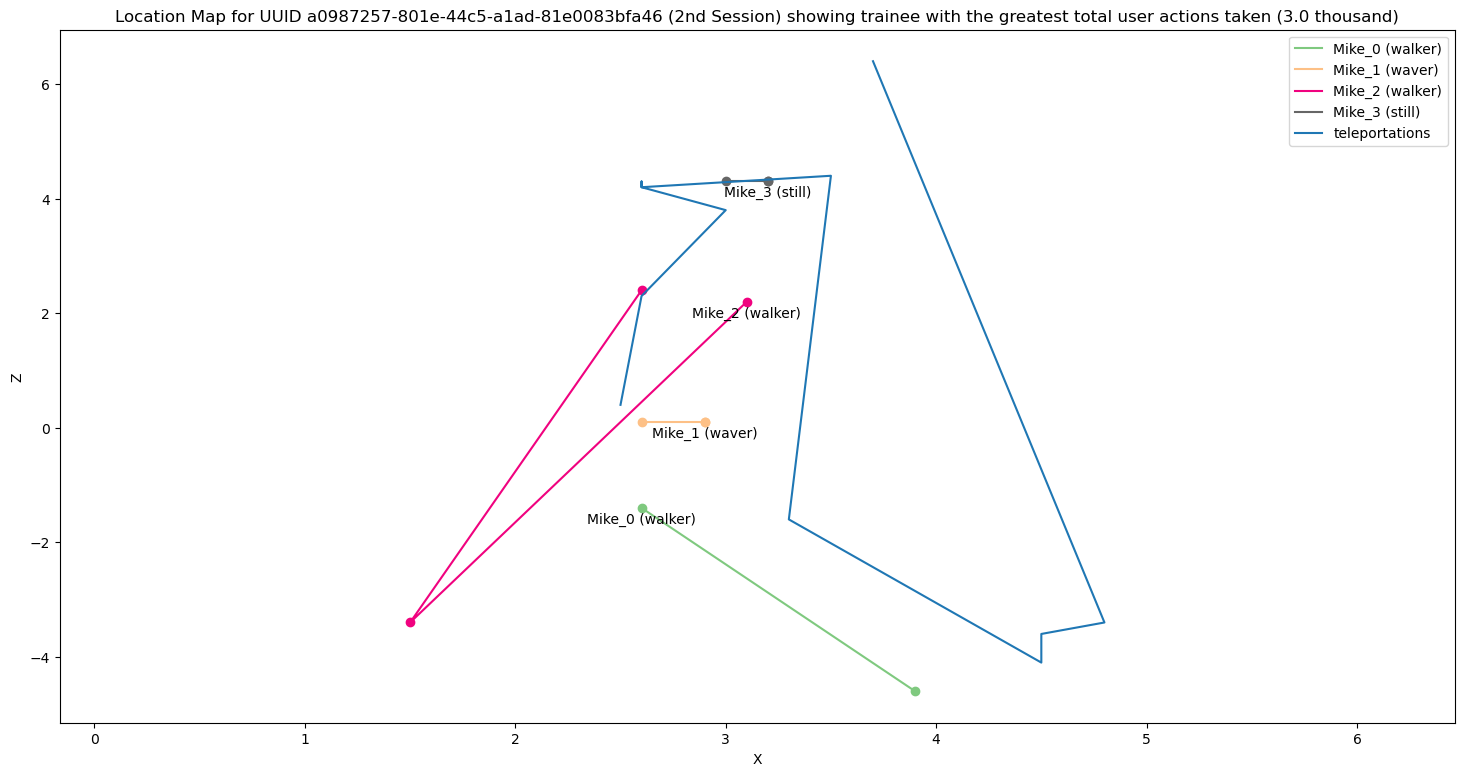

In [18]:

# Get scene with the greatest total user actions taken, v1.0
mask_series = (total_actions_df.logger_version == 1.0)
fu.visualize_extreme_player_movement(
    total_actions_df, 'total_actions', mask_series=mask_series, is_ascending=False, humanize_type='intword',
    title_str='greatest total user actions taken', frvrs_logs_df=frvrs_logs_df, verbose=False
)

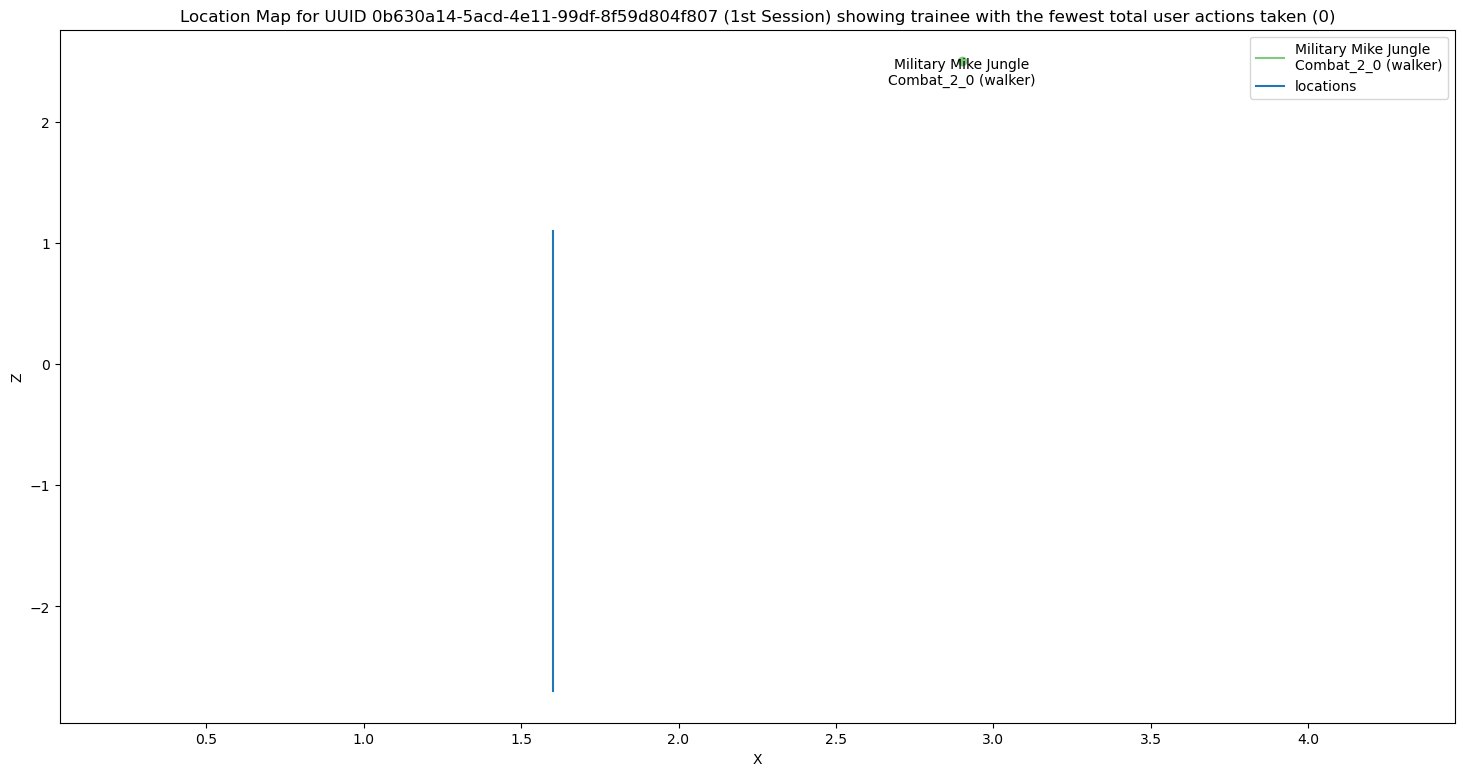

In [9]:

# Get scene with the fewest total user actions taken, v1.3
mask_series = (total_actions_df.logger_version == 1.3)
fu.visualize_extreme_player_movement(
    total_actions_df, 'total_actions', mask_series=mask_series, is_ascending=True, humanize_type='intword',
    title_str='fewest total user actions taken', frvrs_logs_df=frvrs_logs_df, verbose=False
)

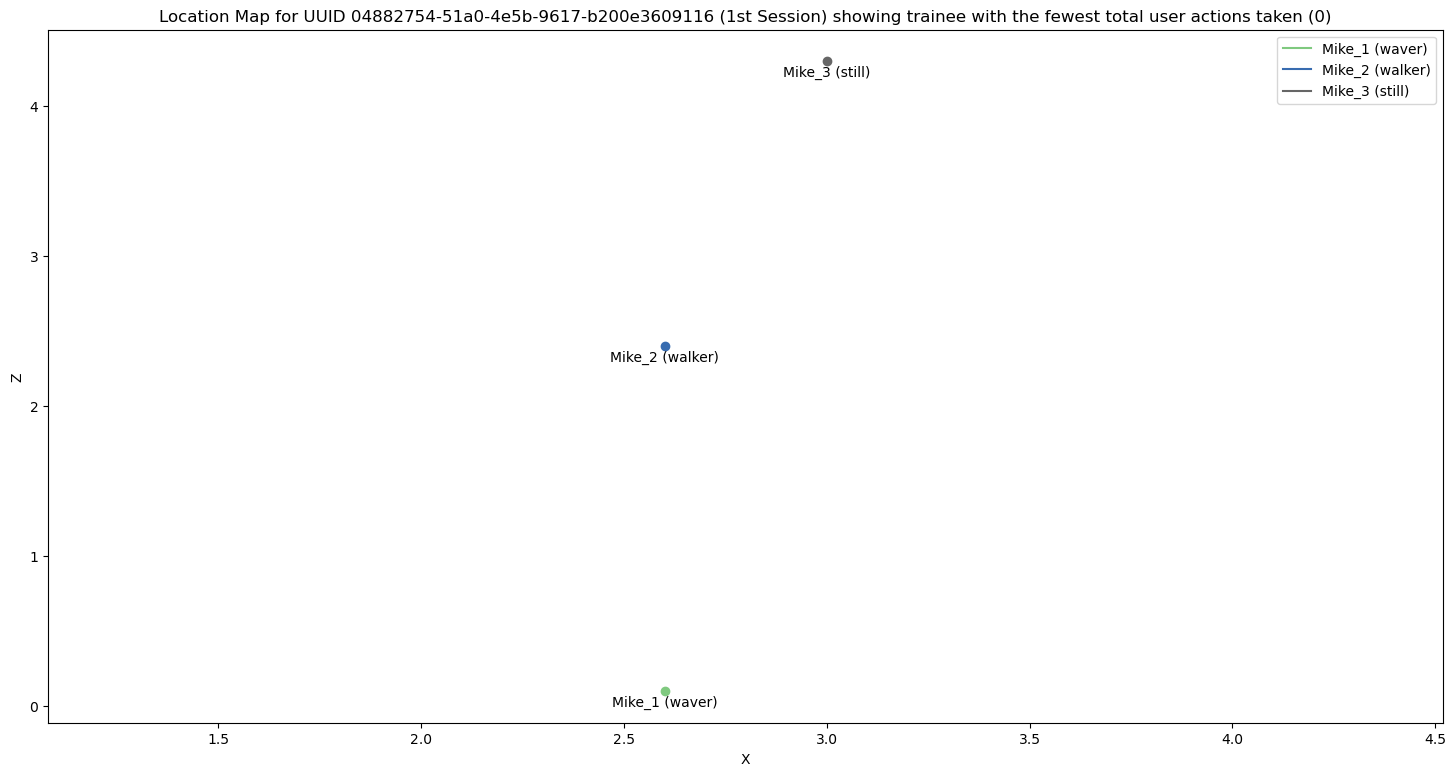

In [10]:

# Get scene with the fewest total user actions taken, v1.0
mask_series = (total_actions_df.logger_version == 1.0)
fu.visualize_extreme_player_movement(
    total_actions_df, 'total_actions', mask_series=mask_series, is_ascending=True, humanize_type='intword',
    title_str='fewest total user actions taken', frvrs_logs_df=frvrs_logs_df, verbose=False
)


## What is the average time between user actions?

In [8]:

# Create a boolean mask to filter rows with action types in the list
mask_series = (frvrs_logs_df.action_type.isin(fu.action_types_list))

# Add to the mask_series to filter rows with specific voice commands
mask_series |= ((frvrs_logs_df.action_type == 'VOICE_COMMAND') & (frvrs_logs_df.voice_command_message.isin(fu.command_messages_list)))
mask_series &= (frvrs_logs_df.scene_type == 'Triage') & (frvrs_logs_df.is_scene_aborted == False)



gb = frvrs_logs_df[mask_series].sort_values(['elapsed_time']).groupby(fu.patient_groupby_columns)
times_between_df = pd.DataFrame([], columns=['elapsed_time', 'logger_version', 'session_uuid', 'scene_index', 'patient_id'])
for (session_uuid, scene_index, patient_id), patient_df in gb:
    
    # Get the difference of each consecutive row in the elapsed time column
    diff_df = patient_df.elapsed_time.diff().to_frame()

    # Add the scene and patient ID into the new dataframe
    diff_df['logger_version'] = fu.get_logger_version(patient_df)
    for cn in fu.patient_groupby_columns: diff_df[cn] = eval(cn)

    # Add the interactions count
    diff_df['interactions_count'] = patient_df.shape[0]
    
    # Add the diff series to the main series
    times_between_df = pd.concat([times_between_df, diff_df], axis='index')

In [9]:

ave_time = humanize.precisedelta(timedelta(milliseconds=times_between_df.elapsed_time.mean()))
print(f'The average time between user actions is {ave_time}.')

The average time between user actions is 3.59 seconds.


<AxesSubplot: title={'center': 'Histogram of the Average Time between User Actions in one Scene'}, xlabel='Average Time between User Actions in one Scene', ylabel='Count of Instances in Bin'>

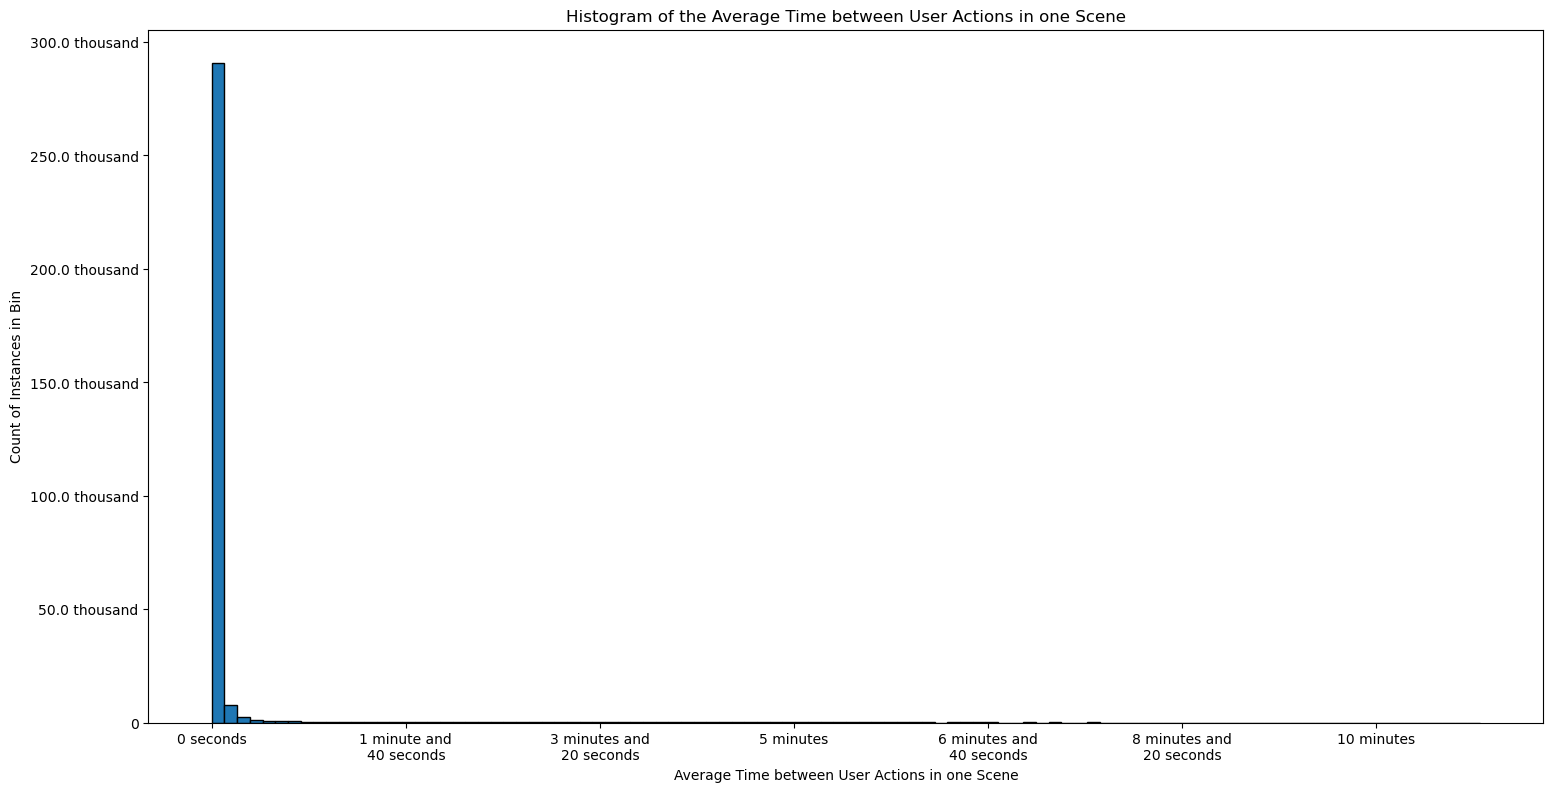

In [10]:

# Display a histogram of the average time between user actions
mask_series = times_between_df.elapsed_time.isnull()
df = times_between_df[~mask_series]
xlabel = 'Average Time between User Actions in one Scene'
get_xtick_text = lambda text_obj: humanize.precisedelta(
    timedelta(milliseconds=text_obj.get_position()[0])
).replace(', ', ',\n').replace(' and ', ' and\n')
title = f'Histogram of the {xlabel}'
nu.plot_histogram(df, 'elapsed_time', xlabel=xlabel, xtick_text_fn=get_xtick_text, title=title)

In [42]:

# 1 second = 1000 milliseconds; 1 minute = 60 seconds
ten_minutes = 1_000 * 60 * 10
delta_fn = lambda x: humanize.precisedelta(timedelta(milliseconds=x))
description = 'mean times between user actions longer'
fu.show_long_runs(df, 'elapsed_time', ten_minutes, delta_fn, description)


These files have mean times between user actions longer than 10 minutes:
DCEMS Round 2 only triage sessions/ab1f8cd1-8d65-45da-b087-89b25ff46c66.csv (or DCEMS Round 2 only triage sessions/23.08.03.0755.csv)
Disaster Day 2022/BC_1136.csv (or Disaster Day 2022/22.03.15.1119.csv)
v.1.0/Clean 724fdf45-3165-43b8-b9ca-dc07102d2886.csv (or v.1.0/23.05.16.1615.csv)



## What is the average interactions per patient?

In [11]:

ave_count = humanize.intword(times_between_df.interactions_count.mean())
print(f'The average interactions per patient is {ave_count}.')

The average interactions per patient is 24.8 thousand.


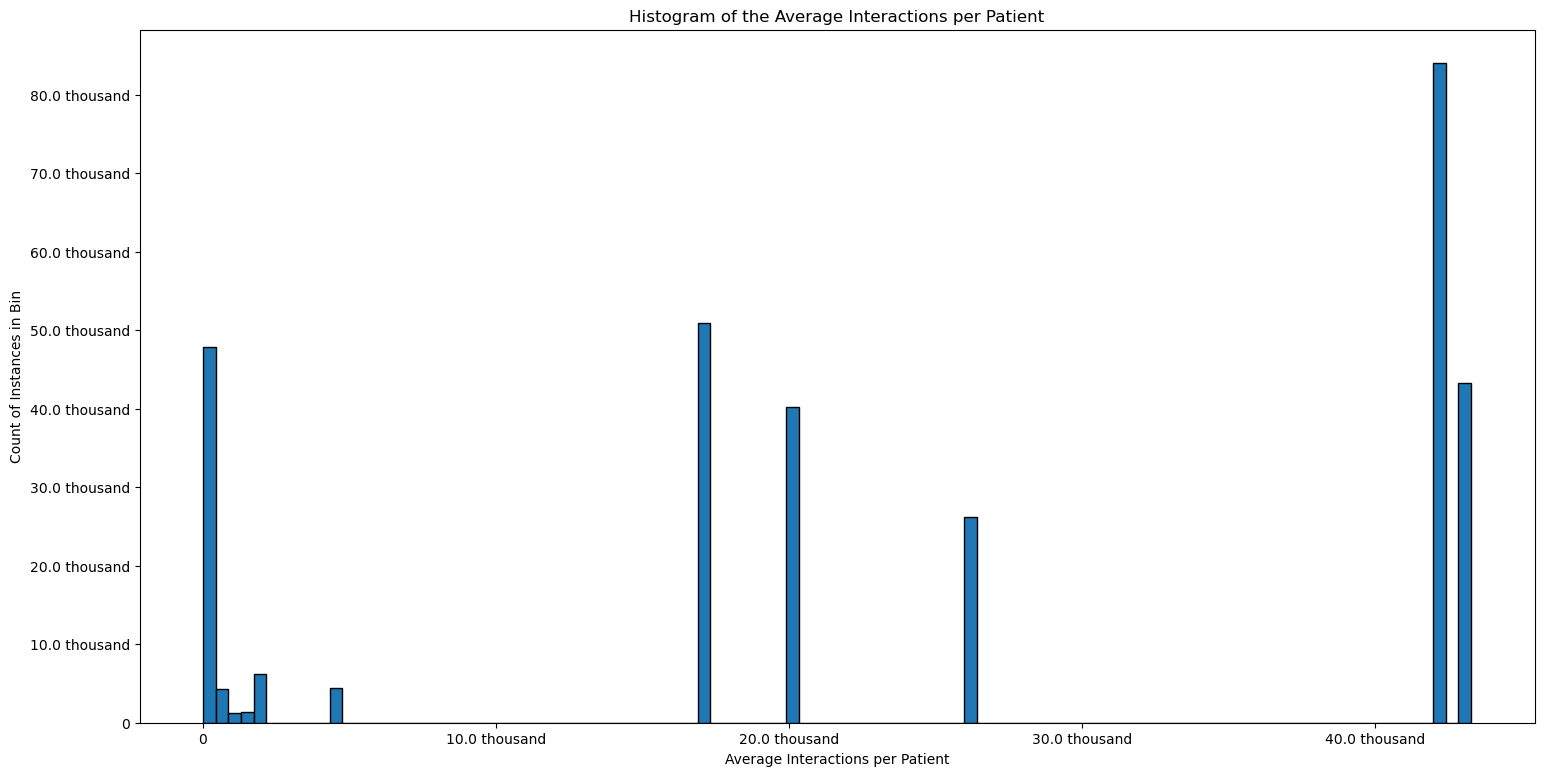

In [13]:

# Display a histogram of the average interactions per patient
mask_series = times_between_df.elapsed_time.isnull()
df = times_between_df[~mask_series]
xlabel = 'Average Interactions per Patient'
get_xtick_text = lambda text_obj: humanize.intword(int(text_obj.get_position()[0]))
title = f'Histogram of the {xlabel}'
ax = nu.plot_histogram(df, 'interactions_count', xlabel=xlabel, xtick_text_fn=get_xtick_text, title=title)

In [43]:

delta_fn = lambda x: humanize.intword(int(x))
description = 'average interactions per patient greater'
fu.show_long_runs(df, 'interactions_count', 1_000, delta_fn, description)


These files have average interactions per patient greater than 1.0 thousand:
All CSV files renamed by date/03.10.23.0925.csv (or All CSV files renamed by date/23.03.10.0925.csv)
All CSV files renamed by date/04.20.23.1147.csv (or All CSV files renamed by date/23.04.20.1134.csv)
All CSV files renamed by date/04.25.23.1013.csv (or All CSV files renamed by date/23.04.25.1013.csv)
DCEMS Round 2 only triage sessions/Kali S..csv (or DCEMS Round 2 only triage sessions/23.07.26.1220.csv)
Disaster Day 2022/JS_1016.csv (or Disaster Day 2022/22.03.15.1008.csv)
Disaster Day 2022/MH_1135.csv (or Disaster Day 2022/22.03.16.1124.csv)
Disaster Day 2022/MT_0950.csv (or Disaster Day 2022/22.03.15.0929.csv)
Disaster Day 2022/RM_1031.csv (or Disaster Day 2022/22.03.16.1027.csv)
Disaster Day 2022/TS_0900.csv (or Disaster Day 2022/22.03.15.0848.csv)
Disaster Day 2022/TW_1019.csv (or Disaster Day 2022/22.03.15.1008.csv)
